In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

def add_path(custom_path):
    if custom_path not in sys.path: sys.path.insert(0, custom_path)

this_dir = os.getcwd()
# [1] Path to modules to resolve import issue
lib_path = os.path.join(this_dir, 'planning_scenario', 'geometric')
add_path(lib_path)

In [2]:
from planning_scenario.geometric.narrow_world import narrow_world
from planning_scenario.geometric.random_world import random_world

## Narrow Passage

Tthis problem is prohibitly expensive with A* (i.e. practically insolvable) or even naive RRT without trick.

Change "bidirectional_rrt" to "astar" to give it a try if you want :-D

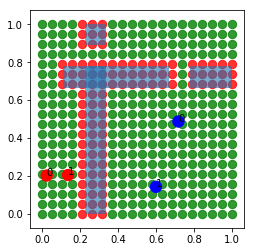

It takes 10.4338 seconds for bidirectional_rrt to solve the plotted planning problem


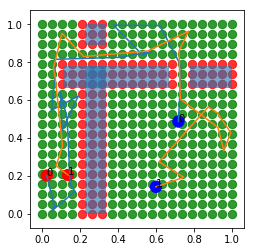

(array([0.02246721, 0.20168336, 0.13516602, 0.20431499]), array([0.02246721, 0.20168336, 0.13516602, 0.20431499, 0.7183862 ,
       0.48725446, 0.59971864, 0.1421333 , 0.        , 0.66666667,
       0.11111111, 0.77777778, 0.66666667, 0.66666667, 0.77777778,
       0.77777778, 0.22222222, 0.77777778, 0.33333333, 0.88888889]))


In [3]:
solver = "bidirectional_rrt"
num_agent = 2
test_world = narrow_world(num_agent)
test_world.plot()
start_cp = time.time()
soln = test_world.solve(solver)
time_elapsed = round(time.time() - start_cp, 4)
print("It takes {0} seconds for {1} to solve the plotted planning problem".format(time_elapsed, solver))
test_world.plot(soln = soln)
data = test_world.get_trainable_data()
print(data[0])

## Random World

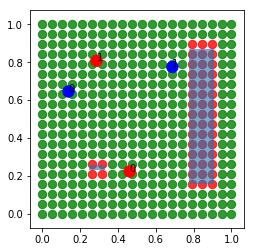

It takes 31.2898 seconds for rrt to solve the plotted planning problem


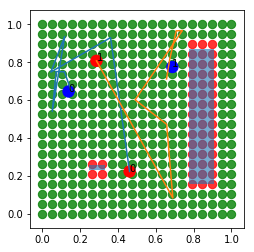

It takes 0.0169 seconds for bidirectional_rrt to solve the plotted planning problem


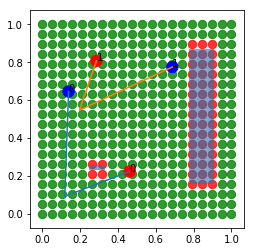

(array([0.4615199 , 0.22344859, 0.28669036, 0.80780108]), array([0.4615199 , 0.22344859, 0.28669036, 0.80780108, 0.13925263,
       0.64578776, 0.68764602, 0.77517254, 0.774     , 0.156     ,
       0.90929066, 0.87171715, 0.246     , 0.231     , 0.33163999,
       0.25625355]))


In [4]:
# When there are obstacles between start position and goals
# A* will be useless
solver = "rrt"
test_world = random_world(2, 10, "rectangle")
test_world.plot()
start_cp = time.time()
soln = test_world.solve(solver)
time_elapsed = round(time.time() - start_cp, 4)
print("It takes {0} seconds for {1} to solve the plotted planning problem".format(time_elapsed, solver))
test_world.plot(soln = soln)
solver = "bidirectional_rrt"
start_cp = time.time()
soln = test_world.solve(solver)
time_elapsed = round(time.time() - start_cp, 4)
print("It takes {0} seconds for {1} to solve the plotted planning problem".format(time_elapsed, solver))
test_world.plot(soln = soln)
data = test_world.get_trainable_data()
print(data[0])